# Exercise 7

Data Preparation

We will train our network on the **CIFAR10** [dataset](https://www.cs.toronto.edu/~kriz/cifar.html), which contains `50,000` 32x32 color training images, labeled over 10 categories, and 10,000 test images. 

As this dataset is also included in Keras datasets, we just ask the `keras.datasets` module for the dataset.

Training and test images are normalized to lie in the $\left[0,1\right]$ interval.

In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Normal option with full database
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()  # File is 160MB

In [2]:
# Only the first training batch and testing  # File is 58MB
import tarfile
from six.moves import cPickle

# Use local copy of the cifar-10 database
data_tar = tarfile.open('../datasets/cifar-10-python_trainingbatch1_test.tar.gz')

def extract_xy(member, data_tar):
    d = cPickle.load(data_tar.extractfile(member), encoding='bytes')
    d_decoded = {}
    for k, v in d.items():
        d_decoded[k.decode('utf8')] = v
    d = d_decoded
    X = d['data']
    X = X.reshape(X.shape[0], 3, 32, 32)
    y = d['labels']
    return X.transpose(0, 2, 3, 1), np.reshape(y, (len(y), 1))

X_train, y_train = extract_xy('cifar-10-batches-py/data_batch_1', data_tar)
X_test, y_test = extract_xy('cifar-10-batches-py/test_batch', data_tar)

In [3]:
X_train.shape, X_test.shape

((10000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
nb_classes = y_train.max() + 1
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [5]:
labels = ['airplane', 'automobile','bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

In [6]:
X_train[0].shape

(32, 32, 3)

In [7]:
y_train[0]

array([6])

In [8]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

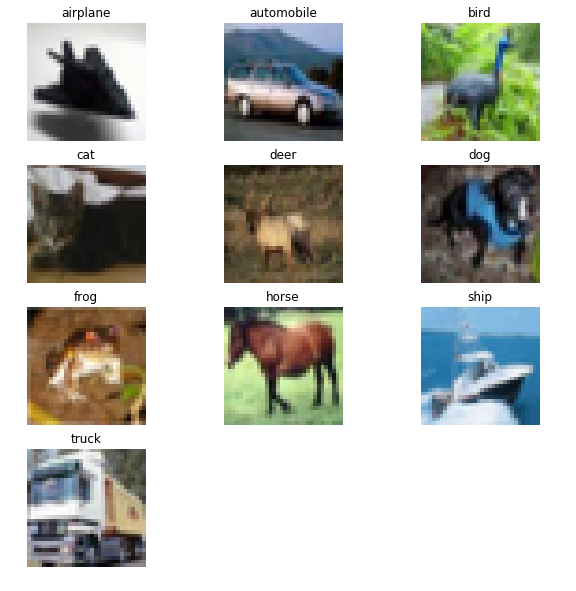

In [9]:
# Select one image per y
images = [np.nonzero(Y_train[:,i] == 1)[0][0] for i in range(nb_classes)]

# Plot all images
fig, ax = plt.subplots(4,3, figsize=(10,10))
ax = ax.reshape(12)
for i in range(nb_classes):
    ax[i].imshow(X_train[images[i]])
    ax[i].set_title(labels[y_train[images[i]][0]])
    ax[i].axis('off')

ax[-1].axis('off')
ax[-2].axis('off')
plt.show()

# Exercise 08.1

Train a Softmax regression using keras
Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 31% with 50 epochs)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop
from livelossplot import PlotLossesKeras
from keras.callbacks import History

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.000025),metrics=['accuracy'])
model.summary()

In [ ]:
h=History()
model.fit(X_train, Y_train, epochs=50,callbacks=[h,PlotLossesKeras()],validation_data=(X_test, Y_test))

In [49]:
dir(h)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [50]:
h.history

{'val_loss': [2.0231585037231445,
  2.000068615722656,
  2.1230066329956054,
  1.9211208419799806,
  2.0911262870788576,
  1.9193519323349,
  1.9503055416107178,
  1.9893779006958008,
  1.9563515647888183,
  1.9477649070739746,
  1.9425230228424073,
  1.969889937210083,
  2.061457287979126,
  2.0382545776367187,
  2.1041308906555174,
  1.92439538898468,
  2.1557864414215087,
  1.8463128101348878,
  1.9486951641082764,
  1.9474299793243408,
  1.9191632839202881,
  2.027463491630554,
  1.9310129941940308,
  1.8697700611114503,
  1.8967393264770507,
  1.942958903503418,
  1.9551784254074096,
  1.9841017396926879,
  1.9169774494171143,
  2.0881429218292236,
  1.9379349405288697,
  1.9081586223602296,
  2.0746081672668457,
  2.046954697418213,
  1.8638329837799072,
  1.9256447467803954,
  1.9979749473571777,
  1.897659213256836,
  2.05890016746521,
  1.887459400177002,
  1.8913045955657959,
  1.8893763244628907,
  2.074896055984497,
  2.0033691440582277,
  1.946024237060547,
  1.87016286888

# Exercise 08.2

Train a Deep Neural Network with the following architecture:

- Input = Image (32, 32, 3)
- Conv2d(32, (3,3), padding='same')
- Relu Activation
- MaxPooling2D (2,2)
- Dropout(0.5)
- Flattern
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 55% with 50 epochs)

In [15]:
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPooling2D,Dropout

In [79]:
# apply a 3x3 convolution with 32 output filters on a 32x32 image:
model2d = Sequential()
model2d.add(Conv2D(32, (3, 3), padding='same',input_shape=(32, 32, 3)))
model2d.add(Activation('relu'))
model2d.add(MaxPooling2D(2,2))
model2d.add(Dropout(0.5))
model2d.add(Flatten())
model2d.add(Dense(10))
model2d.add(Activation('softmax'))
model2d.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])
model2d.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_31 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                81930     
_________________________________________________________________
activation_32 (Activation)   (None, 10)                0         
Total para

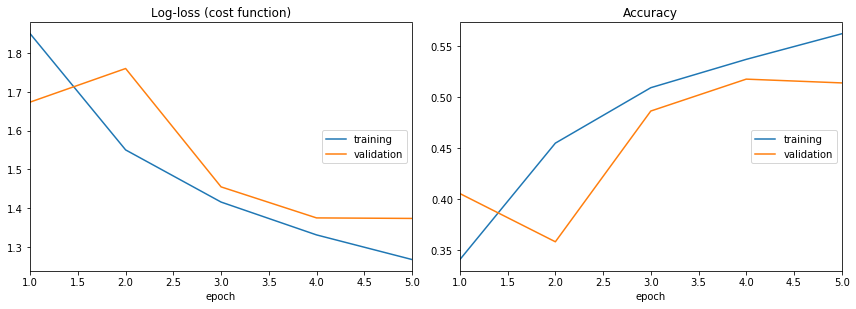

In [80]:
h2d=History()
model2d.fit(X_train, Y_train, epochs=5,callbacks=[h2d,PlotLossesKeras()],validation_data=(X_test, Y_test))

# Exercise 08.3

Use the last layer of VGG16 as the input to a neural network with softmax output

- Input = Image (32, 32, 3)
- VGG16 
- Flattern
- Dense(512, Softmax)
- Dropout(0.5)
- Dense(10, Softmax)

Optimized using rmsprop using as loss categorical_crossentropy

Hints: 
- test with two iterations then try more. 
- learning can be ajusted

Evaluate the performance using the testing set (aprox 57% with 50 epochs)

In [13]:
from keras.applications.vgg16 import VGG16
model_vgg16 = VGG16(weights='imagenet', include_top=False)

In [46]:
model_vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [17]:
X_train2=model_vgg16.predict(X_train)

In [33]:
X_test2=model_vgg16.predict(X_test)

In [ ]:
modelvg=Sequential()
modelvg.add(Flatten(input_shape=X_train2.shape[1:]))
modelvg.add(Dense(512))
modelvg.add(Activation('softmax'))
modelvg.add(Dropout(0.5))
modelvg.add(Dense(10))
modelvg.add(Activation('softmax'))
modelvg.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.00001),metrics=['accuracy'])

In [ ]:
hvg=History()
modelvg.fit(X_train2,Y_train, epochs=20,callbacks=[hvg,PlotLossesKeras()],validation_data=(X_test2, Y_test))

# Exercise *08.4 (Bonus)

Test a different pre-train algorithm (https://keras.io/applications/#usage-examples-for-image-classification-models) 

In [10]:
from keras.applications.resnet50 import ResNet50
model_resnet50 = ResNet50(weights='imagenet', include_top=False)

In [11]:
model_resnet50.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [12]:
X_train3=model_resnet50.predict(X_train)

In [13]:
X_test3=model_resnet50.predict(X_test)

In [28]:
modelrn50=Sequential()
modelrn50.add(Flatten(input_shape=X_train3.shape[1:]))
modelrn50.add(Dense(512))
modelrn50.add(Activation('softmax'))
modelrn50.add(Dropout(0.5))
modelrn50.add(Dense(10))
modelrn50.add(Activation('softmax'))
modelrn50.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.00001),metrics=['accuracy'])

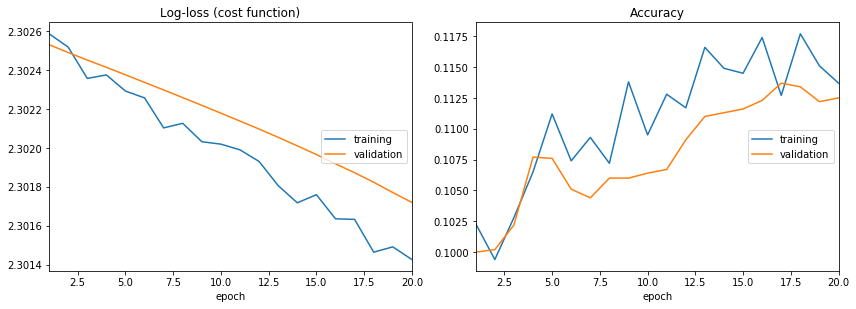

In [29]:
hrn50=History()
modelrn50.fit(X_train3,Y_train, epochs=20,callbacks=[hrn50,PlotLossesKeras()],validation_data=(X_test3, Y_test))